In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------JUPYTER NOTEBOOK SETTINGS-------------------------------------------------------------------------------------
from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))   

C:\Users\Ciprian-Florin Ifrim\AppData\Local\Temp\ipykernel_22004\1285825539.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


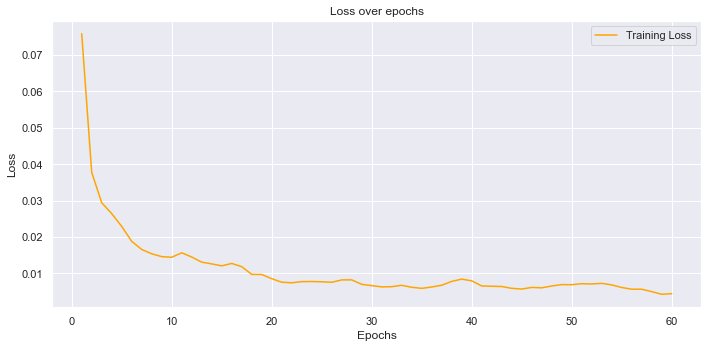

In [11]:
# Load the model checkpoint
checkpoint_name = "checkpoint_epoch_60.pth"
checkpoint_folder = "FINAL_rcnn_batch-16_epoch-60_full-enchanced-original_non-augmented"
checkpoint = torch.load("pytorch_rcnn_checkpoints/" + checkpoint_folder + "/" + checkpoint_name)

# Extract loss histories
loss_hist = checkpoint['loss_hist']
valid_loss_hist = checkpoint.get('valid_loss_hist', None) # Returns None if 'valid_loss_hist' does not exist

# Define the number of epochs based on the length of loss history
num_epochs = len(loss_hist)

# Create a pandas DataFrame for loss history
df_loss = pd.DataFrame(data={'Epoch': range(1, num_epochs + 1), 
                             'Training Loss': loss_hist})

if valid_loss_hist is not None:
    df_loss['Validation Loss'] = valid_loss_hist

# Configure Seaborn
sns.set_theme()

# Plotting the loss using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_loss, x='Epoch', y='Training Loss', color='orange', label='Training Loss')

# Plot Validation Loss only if it exists in df_loss
if 'Validation Loss' in df_loss.columns:
    sns.lineplot(data=df_loss, x='Epoch', y='Validation Loss', color='blue', label='Validation Loss')

plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("training_loss_plots/" + checkpoint_folder + ".png", dpi=300)

# Show the plot (which also resets the current figure and axes)
plt.show()
